In [ ]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

X: (100, 2) y (100, 1) w: (2, 1)


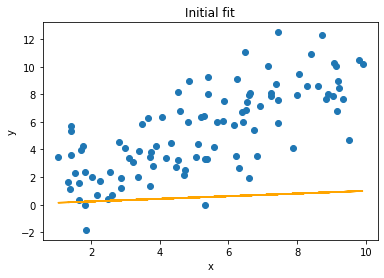

Initial weights: [0.04076764] [0.09571038]


In [ ]:
n = 100
X = rng.uniform(1, 10, size = n).reshape((-1, 1))
y = X + rng.normal(0, 2, n).reshape((-1, 1))
X = np.hstack((np.ones(shape = (X.shape[0], 1)), X)) # Add an intercept column to X
#p = rng.permutation(len(X)) # Shuffle X, and y in unison
#X, y = X[p], y[p]
w = rng.uniform(low = -0.1, high = 0.1, size = X.shape[1]).reshape((-1, 1)) # Initialize weights randomly [0, 1)
w_old = w.copy()
print('X:', X.shape, 'y',  y.shape, 'w:', w.shape) # Sanity check
ys = X@w
plt.xlabel('x'), plt.ylabel('y'), plt.title('Initial fit')
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], ys, 'orange')
plt.show()
print('Initial weights:', *w)

In [ ]:
X.shape, X.T.shape

((100, 2), (2, 100))

In [ ]:
h = np.linspace(0.0001, 10, 100)
ws = []

for hp in h:
    opt_w = np.linalg.inv(X.T@X + hp*X.shape[1]*np.identity(X.shape[1]))@(X.T@y)
    ws.append(opt_w)
    


In [ ]:
ws = np.array(ws).reshape((-1, 2))
ws.shape, h[0:10]

((100, 2),
 array([1.00000000e-04, 1.01109091e-01, 2.02118182e-01, 3.03127273e-01,
        4.04136364e-01, 5.05145455e-01, 6.06154545e-01, 7.07163636e-01,
        8.08172727e-01, 9.09181818e-01]))

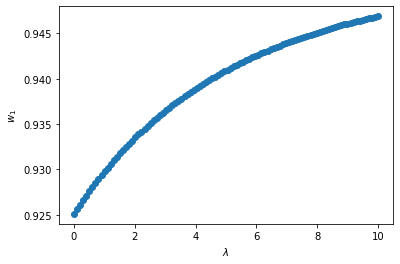

In [ ]:
plt.scatter(h, ws[:, 1])
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$w_1$')
plt.show()